# Исследование рынка игр и составление портрета пользователя

Заказчик — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Даны данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


__Описание данных:__


- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

__Цель исследования:__
1. Провести исследовательский анализ данных.
2. Составить портрет пользователя для каждого региона.
3. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
    
__Ход исследования:__
 1. Обзор данных:
 2. Подготовка данных.
 3. Исследовательский анализ.
 4. Составление портрета пользователя
 5. Проверка гипотез.

### Подготовка окружения
Загрузим все библиотеки, требуемые для работы в ходе проекта в рамках одной ячейки.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

---

## Открытие файла с данными и изучение информации о данных <a class="anchor" id="open"></a>

In [4]:
try:
    games = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    games = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов

Изучим информацию о данных. Выведем на экран первые пять строк таблицы, основную обзоную и статистическую информацию.

In [5]:
games.isnull().sum() / games.shape[0] * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [6]:
display(games.head())
print(games.info())
pd.options.display.float_format = '{:,.2%}'.format
print(games.isnull().sum() / games.shape[0])
pd.options.display.float_format = '{:,.2f}'.format
games.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Name               0.01%
Platform           0.00%
Year_of_Release    1.61%
Genre              0.01%
NA_sales           0.00%
EU_sales           0.00%
JP_sales           0.00%
Other_sales        0.00%
Critic_Score      51.32%
User_Score 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


По результатам обзора данных можно сделать следующие наблюдения:
1. В данных есть явные пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`.
    - Так как добыть информацию об имени представленной игры не представляется возможным и таких пропусков только два, можно оставить эти строки без изменения. Названия игр не играют ключевой роли в исследовании, соответственно удалять такие игры для того что бы избежать искажения результатов нет смысла. 
    - Информацию о жанре можно найти в интернете, благо таких пропусков тоже два. 
    - Так как пропусков в столбце с годом релиза значительное количество, целесообразнее будет заполнить их средним значением для платформы выпуска. Искать в интернете информацию по такому большому пулу игр будет затруднительно. 
    - Заполнять значения рейтинга, оценки критиков и пользователей кажется неверным, так как пропусков очень много и любое, даже более-менее точное заполнение приведет к сильному искажению данных и результатов анализа.
    
    
2. Значение года релиза хранится в несоответсвующем типе данных, необходимо будет изменить его на тип int. Знначение оценки пользователей также указано в строковом формате, необходимо будет перевести его в формат float.
3. Есть игры, не проданные ни в одном из регионов. Их не менее 25%.
4. Столбцы имеют несоответствующие названия, необходимо привести их к общему виду.

## Подготовка данных <a class="anchor" id="prepare_data"></a>


### Постановка задачи <a class="anchor" id="prepare_task"></a>

В рамках предобработки данных необходимо:

1. Заменить названия столбцов. Привести к нижнему регистру.
3. Обработать пропуски в столбцах:
    - пропуски в столбце `Name` оставим без изменения, лишь изучим, какие игры остались без названия;
    - пропуски в столбце `Year_of_Release` необходимо заменить на среднее значение по типу платформы, для которой создана игра. Замена именно по типу платформы связана с тем, что платформы устаревают и игры, выпущенные на них ограничены сроком продажи и поддержки самой платформы;
    - пропуски в столбце `Genre` можно заполнить, найдя в интернете. Таких пропусков только два, поэтому это не трудоемкая задача;
    - Пропуски в столбца `Critic_Score`, `User_Score` и `Rating` придется оставить без изменения, так как любые аппроксимации приведут к значительному искажению результатов анализа;
2. Привести данные к необходимому типу:
    - значения столбца `Year_of_Release` необходимо привести к типу int;
    - значения столбца `User_Score` необходимо привести к типу float;
4. Рассчитать суммарные продажи игр во всех регионах.

### Приведение названий столбцов к общему виду

Сперва приведем названия столбцов к общему виду. Заменим названия столбцов на аналогичные в нижнем регистре.

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Лишних пробелов в названиях нет, названия унифицированы.

###  Обработка пропусков

Обработаем пропуски в данных. Начнем с названия игры.

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По играм есть информация о годе выпуска, платформе и продажах. Оставим данные без изменения. Также два пропущенных значения жанра как раз не указаны для этих игр. Их также оставим без изменения.

Так как пропуски в столбце с годом выпуска составляют незначительную долю от всех данных, удалим такие наблюдения.

In [9]:
games['year_of_release'].dropna(inplace=True)

Проверим, все ли пропуски в годе выпуска были удалены.

In [10]:
sum(games.year_of_release.isna())

269

В столбце с годом релиза не осталось пропусков, все прочие пропуски целесообразно оставить без изменения.

### Изменение типа данных <a class="anchor" id="change"></a>

Приведем типы данных в столбцах к нужным. Начнем со значений года релиза.

In [11]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], downcast='integer')

Изучим значения в столбце пользовательских оценок. Так как pandas при прочтении файла автоматически определяет тип данных, а данные пользовательских оценок определены как строковый тип, вероятно в данных есть строковые значения.

In [12]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных действительно есть оценки, помеченные как "tbd". Часто такое сокращение используют в значении "to be determined". Изучим игры, которые имеют такую оценку.

In [13]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


В выборке представлены как старые, так и более-менее новые игры, с ненулевыми продажами и имеющимся рейтингом и отзывами критиков. Вероятно такие игры имеют недостаточное количество отзывов от пользователей, что бы определить точный рейтинг. Заменим такие значения на пустые и будем считать, что оценку пользователи пока не выставили.

In [14]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

Изменим тип данных в столбце на вещественный

In [15]:
games['user_score'] = pd.to_numeric(games['user_score'])

Проверим, в обоих ли столбца тип данных был изменен.

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Теперь значения года выпуска хранятся в целочисленном типе данных, а значения пользовательской оценки в вещественном.

### Расчёты <a class="anchor" id="calculations"></a>


Суммируем значения продаж в различных регионах и запишем в отдельный столбец.

In [17]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Вывод <a class="anchor" id="prepare_conclusion"></a>


Вся необходимая предобработка для дальнейшего анализа проведена, можем переходить к исследовательскому анализу данных.

## Исследовательский анализ данных <a class="anchor" id="eda_part"></a>


### Постановка задачи <a class="anchor" id="eda_task"></a>

В рамках исследовательского анализа данных необходимо ответить на следующие вопросы:

- оценить количество игр, выпускавшихся по годам. Оценить необходимость включения данных по играм, выпущенным в каждый период в дальнейший анализ;
- оценить динамику продаж игр в завимости от платформы. Выбрать наиболее популярные платформы и оценить жизненный цикл платформы;
- сформировать пул данных, которые позволят спрогнозировать спрос на игры на 2017 год;
- оценить текущую тенденцию на рынке и выделить лидирующие, растущие и падающие в продажах платформы;
- оценить распределение и статистические показатели продаж игр по платформам;
- оценить зависимость продаж игр в зависимости от отзывов критиков и зрителей в рамках одной платформы;
- изучить распределение игр по жанрам уровень продаж игры в зависимости от жанра.

### Исследовательский анализ данных


#### Количество игр по годам


Изучим данные о количестве игр, выпускаемых по годам.

<function matplotlib.pyplot.show(close=None, block=None)>

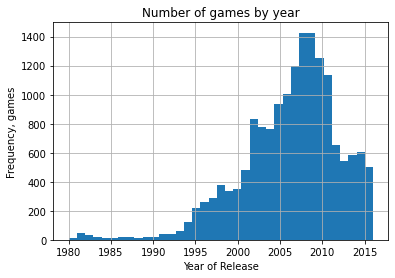

In [18]:
games['year_of_release'].hist(bins=37).set(xlabel="Year of Release", ylabel="Frequency, games", title='Number of games by year')
plt.show

По графику видно, что выпуск игр стабильно рос до 2008 года, после чеего резко упал и теперь находится на условном "плато". Вероятнее всего это было вызвано кризисом 2008 года, в который, на фоне резкого снижения уровня доходов, больше всего пострадали как раз индустрии развлечений - игры, кино и прочие.


Игры, выпущенные до 1990 года составляют совсем незначительную долю от всех игр. На данном этапе отбрасывать игры на основании года выпуска нецелесообразно, так как в дальнейшем более старые игры для неактуальных уже платформ будут исключены из анализа за счет исключения старых платформ.

#### Динамика продаж по платформе


Также изучим динамику продаж игр в зависимости от платформы, для которой игра выпущена. Построим график изменения средней цены по годам для платформ.

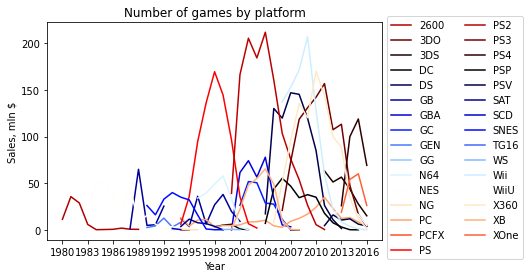

In [19]:
platform_dinamic = games.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')
palette = plt.get_cmap('flag')
num = 32
for column in platform_dinamic:
    num -= 1
    plt.plot(platform_dinamic.index, platform_dinamic[column], color=palette(num))
plt.xlabel('Year')
plt.ylabel('Sales, mln $')
plt.title('Number of games by platform')
plt.legend(platform_dinamic.columns, ncol=2, bbox_to_anchor=(1, 1.05))
plt.xticks(range(1980, 2017, 3))
plt.show()

Судя по графику срок жизни платформы составляет около 10-15 лет. Это неудивительно, учитывая, с какой скоростью проходит прогресс на игровом рынке.


Будем считать, что актуальный период - с 2014 года. Так как игровая индустрия меняется очень динамично, брать данные за более дальние периоды нецелесообразно. К 2017 году большинство платформ, представленных ранее в анализе уже не поддерживаются - игры на них не выпускаются, поэтому они избыточны для целей нашего исследования. Кроме этого старые данные не показывают текущее положение вещей на рынке, по ним нельяза оценить актуальные тенденции.

Отбросим данные за период с 2014 года.

In [20]:
games = games[games['year_of_release'] >= 2014]

Построим график с обновленныими данными - только играми, младше 2014 года.

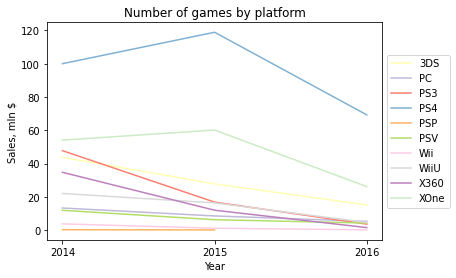

In [21]:
platform_dinamic = games.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')
palette = plt.get_cmap('Set3')
num = 0
for column in platform_dinamic:
    num += 1
    plt.plot(platform_dinamic.index, platform_dinamic[column], color=palette(num))
plt.xlabel('Year')
plt.ylabel('Sales, mln $')
plt.xticks((2014, 2015, 2016))
plt.title('Number of games by platform')
plt.legend(platform_dinamic.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

По графику можно сказать, что лидирующими на данный момент платформами являются Xbox One и Playstation 4. Также только они показали рост в 2015 году к 2014 году. Остальные платформы и не показывают рост и не являются лидерами по продажам. Все еще довольно популярной платформой является Nintendo 3DS, однако ее продажи падают.

Судя по спаду по всем платформам, даже растущим, данные за 2016 год очень неполны, вероятно данные есть только за первые полгода.

#### Анализ продаж актуальных платформ


Для дальнейшего анализа возьмем пять актуальных на данный момент платформ, с наибольшими продажами на 2015 год. 2015 год в дальнейшем анализе будем брать как наиболее репрезентативный по продажам. Так как данные за 2016 год неполны, они могут показывать искаженную картину ситуации на рынке.

In [22]:
top_platform = list(platform_dinamic.loc[2015,].sort_values(ascending=False).head().index)
actual_games = games[games['platform'].isin(top_platform)]

Построим "боксплот" для этих пяти платформ.

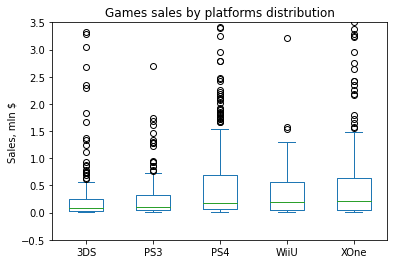

In [23]:
actual_games.pivot_table(columns='platform', index='name', values='total_sales', aggfunc='sum').plot(kind='box', title='Games sales by platforms distribution')
plt.ylim(-0.5, 3.5)
plt.ylabel('Sales, mln $')
plt.show()

На графике отчетливо видно, что среднее значение для каждой платформы больше медианного, есть жирные "хвосты" в большую сторону - некоторые игры приносят значительные деньги, продаваясь огромными тиражами, тогда как большая часть продается ограниченным тиражом. Распределения Xbox One, Playstation 3 и 4 достаточно похожи, продажи игр для 3DS и WiiU в среднем ниже.

#### Анализ продаж в зависимости от оценок критиков и пользователей


Рассмотрим влияние отзывов критиков и игроков на продажи игр в зависимости от платформы.

<Figure size 432x288 with 0 Axes>

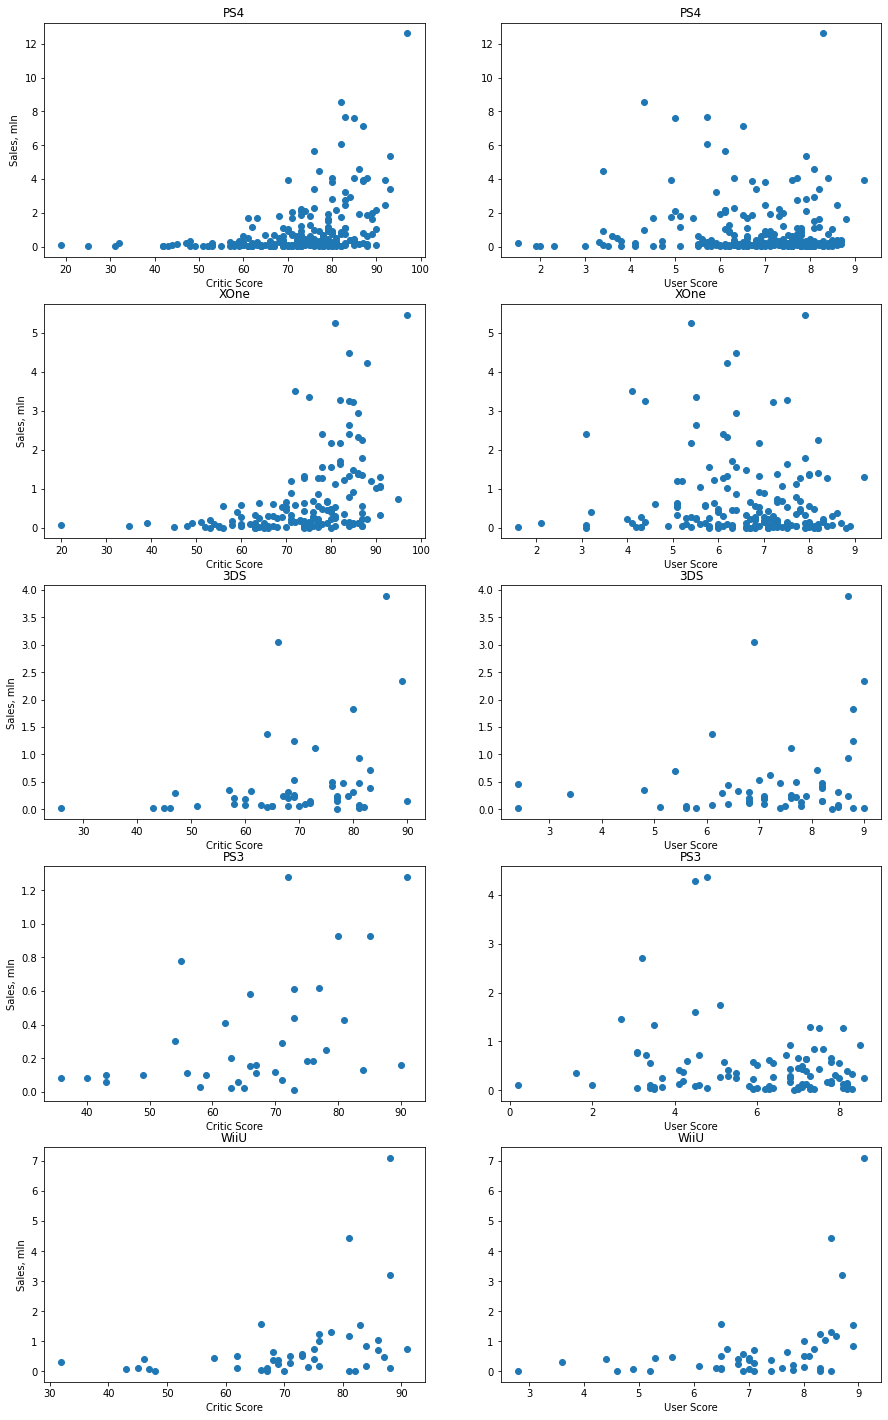

In [24]:
num = 0

figure = plt.figure()
figure, axes = plt.subplots(ncols=2, nrows=5, sharex=False, sharey=False, figsize=(15,25))

for platform in top_platform:
    axes[num][0].scatter(actual_games[actual_games['platform'] == platform]['critic_score'],actual_games[actual_games['platform'] == platform]['total_sales'])
    axes[num][0].set_title(platform)
    axes[num][0].set_xlabel('Critic Score')
    axes[num][0].set_ylabel('Sales, mln')
    axes[num][1].scatter(actual_games[actual_games['platform'] == platform]['user_score'], actual_games[actual_games['platform'] == platform]['total_sales'])
    axes[num][1].set_title(platform)
    axes[num][1].set_xlabel('User Score')
    axes[num][0].set_ylabel('Sales, mln')
    num += 1

plt.show()

На графике видна средняя зависимость продаж игр в штуках от пользовательских оценок и оценок критиков. Однако зависимость от пользовательских оценок слабее для платформ Playstation 3 и 4 и для Xbox One. Посчитаем корреляцию между значениями пользовательских оценок и оценок критиков и продажами.

In [25]:
for platform in top_platform:
    print('Корелляция для платформы ',
          platform,
          ': между отзывами критиков и продажами - ',
          '{:.2f}'.format(actual_games[actual_games['platform'] == platform]['critic_score'].corr(actual_games[actual_games['platform'] == platform]['total_sales'])),
          ', между отзывами пользователей и продажами - ',
          '{:.2f}'.format(actual_games[actual_games['platform'] == platform]['user_score'].corr(actual_games[actual_games['platform'] == platform]['total_sales'])), sep='')


Корелляция для платформы PS4: между отзывами критиков и продажами - 0.40, между отзывами пользователей и продажами - -0.04
Корелляция для платформы XOne: между отзывами критиков и продажами - 0.43, между отзывами пользователей и продажами - -0.07
Корелляция для платформы 3DS: между отзывами критиков и продажами - 0.31, между отзывами пользователей и продажами - 0.22
Корелляция для платформы PS3: между отзывами критиков и продажами - 0.45, между отзывами пользователей и продажами - -0.17
Корелляция для платформы WiiU: между отзывами критиков и продажами - 0.37, между отзывами пользователей и продажами - 0.41


Корреляция между отзывами критиков и продажами присутствует, однако выражена средне. Зависимость для платформ Playstation 3 и 4 и для Xbox One выражена сильнее. Как было упомянуто зависимость между оценками пользователей и продажами для платформ Nintendo сильнее, чем для прочих.

#### Выявление прибыльных жанров


Посмотрим на распределение продаж игр по жанрам. Будем рассматривать данные только для актуальных платформ, так как для устаревших платформ жанровые предпочтения пользователей будут другие в силу технических ограничений платформ и их ориентированности на те или иные жанры.

Построим боксплот для распределений продаж игр в зависимости от жанра. Отсортируем по средним продажам для жанра.

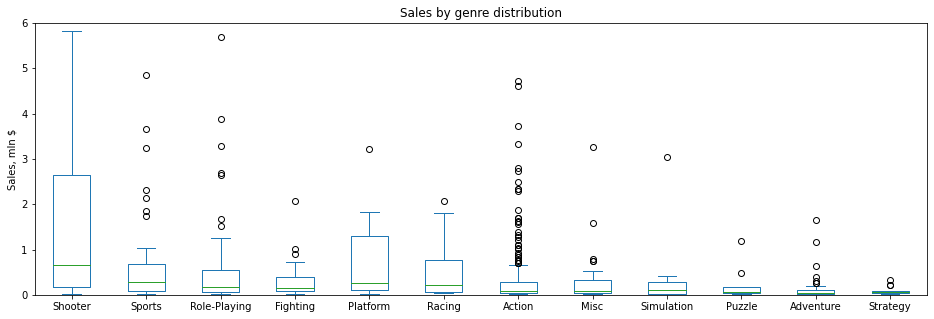

In [26]:
(
    actual_games.pivot_table(columns='genre', index='name', values='total_sales', aggfunc='mean', margins=True)
    .sort_values(by='All', axis=1, ascending=False)
    .drop('All', axis=1)
    .plot(kind='box', title='Sales by genre distribution', figsize=(16, 5))
)

plt.ylim(0, 6)
plt.ylabel('Sales, mln $')
plt.show()

Наиболее прибыльный жанр - Shooter - именно он показывает наиболее высокие показатели средних продаж, на втором месте -  спортивные симуляторы. Ролевые симуляторы на третьем месте. Наименее популярны у игроков на консолях стратегии, пазлы и adventure игры, что неудивительно, учитывая неудобство игры в такие игры на консолях. Стратегии как правило ориентированы на ПК пользователей, головоломки - на мобильные платформы.

В жанрах Action, Racing и Platform выходит большое количество игр, но средние продажи таких игр невысоки.

### Вывод <a class="anchor" id="eda_conclusion"></a>


На данный момент есть только несколько платформ, которые занимают лидирующие места по количеству издаваемых в год игр. Это PS3, PS4, XOne, 3DS, WiiU. При этом платформы PS3, 3DS и WiiU сдают позиции, показывая снижение объема выпуска, а PS4 и XOne наращивают продажи. Для прогнозирования спроса на игры на будущие периоды стоит рассматривать именно эти пять платформ, ожидая от PS4 и XOne роста доли на рынке, а от прочих - снижения.


Наиболее перспективные жанры - Shooter, Racing, Sports и Role-Playing. Они вероятнее всего сохранят свои позиции в будущих периодах, но скорее всего не усилят позиции.


Для определения перспективы той или иной игры, выходящей на рынок целесообразнее ориентироваться на отзывы критиков. Есть некоторая корреляция между отзывами критиков и продажами игры. Пользовательские оценки меньше влияют на продажи. Это закономерно, ведь именно отзывы критиков публикуются в СМИ, создают ажиотаж и ожидание игры пользователями. Пользовательские оценки как правило влияют на позицию игры в рейтингах, которые не так сильно влияют на известность игры и уровень ожидания и продаж.

## Составление портрета пользователя


### Постановка задачи <a class="anchor" id="eda_task"></a>

В рамках составления портрета пользователя для каждого региона, необходимо сформировать список самых популярных на данный момент платформ и жанров, а также определить влияние возратного рейтинга игры на ее продажи в этом регионе.

### Составление портрета пользователя


Сформируем список популярных платформ для каждого из трех регионов. Для этого возьмем актуальные данные, то есть продажи игр на 2015 год.

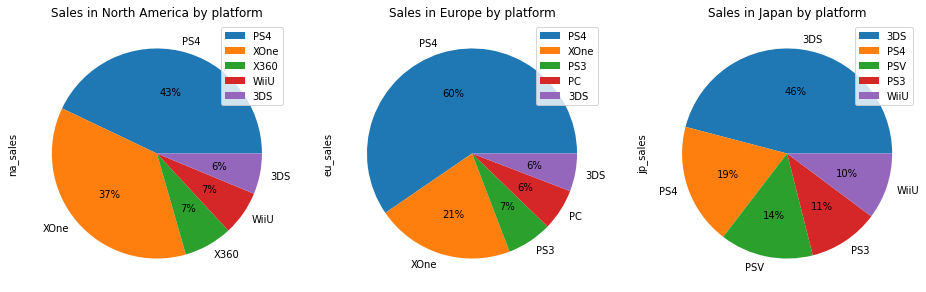

In [27]:
plt.figure(figsize=(16, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    (
        games[games['year_of_release'] == 2015]
        .pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales')[i], aggfunc='sum')
        .sort_values(by=('na_sales', 'eu_sales', 'jp_sales')[i], ascending=False)
        .head()
        .plot(kind='pie',
              y=('na_sales', 'eu_sales', 'jp_sales')[i],
              ax=ax,
              title=f'Sales in {("North America", "Europe", "Japan")[i]} by platform',
              autopct='%.0f%%')
    )

Пользователи из Северной Америки чаще всего выбирают платформы PS4 и Xbox One. В пятерку лидеров также входят Xbox 360, WiiU и 3DS.
Пользватели из Европы также предпочитают эти две платформы, однако пятерка лидеров иная - Playstation 3 и PС более популярны и вытесняют Xbox 360, WiiU, в сравнении с Америкой.
Пользователи из Японии чаще всегор выбирают платформы от собственных производителей - Sony и Nintendo, а лидирует 3DS, американские платформы Xbox от Microsoft не так популярны в Японии. Также можно обратить внимание на более высокую конкуренцию между платформами в Японии - в отличии от Америки и Европы, где Xbox и Playstation занимают почти весь рынок, в Японии доли распределены  равномернее, но лидер 3DS все равно занимает 46% рынка.

Посмотрим на жанровые предпочтения пользователей из Европы, Америки и Японии. В силу различия в популярных платформах, Европа и Америка вероятнее всего покажет схожие результаты, а Япония будет сильно отличаться.

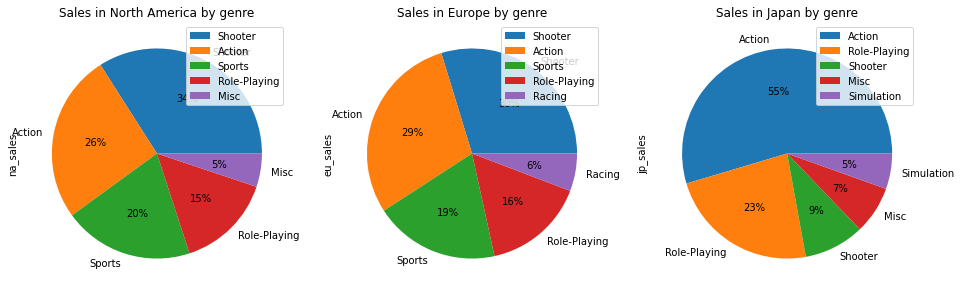

In [28]:
plt.figure(figsize=(16, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    (
        games[games['year_of_release'] == 2015]
        .pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales')[i], aggfunc='sum')
        .sort_values(by=('na_sales', 'eu_sales', 'jp_sales')[i], ascending=False)
        .head()
        .plot(kind='pie',
              y=('na_sales', 'eu_sales', 'jp_sales')[i],
              ax=ax,
              title=f'Sales in {("North America", "Europe", "Japan")[i]} by genre',
              autopct='%.0f%%')
    )

Как и ожидалось, топы европейских и американских жанров почти идентичны - разнятся только доли и в Европе популярнее гоночные симуляторы, а в Америке музыкальные.

В Японии же лидерами стали Action и Role-Playing игры, вытеснив шутеры на третье место, а также место спортивных симуляторов заняли обычные симуляторы, пусть и с небольшой долей. Можно сказать, что в Японии игровой рынок сильно отличается от европейского и американского. Он более разношерстный, нет четкого лидера среди платформ и среди жанров.

Сопоставим влияние возрастного рейтинга на продажи игр в зависимости от региона.

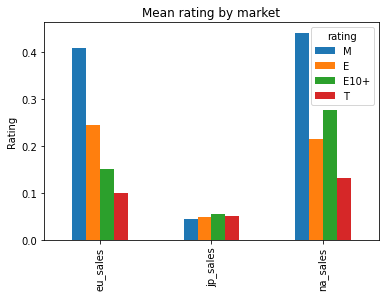

In [29]:
games[games['year_of_release'] == 2015].pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='mean').sort_values(by='eu_sales', ascending=False).T.plot(kind='bar', title='Mean rating by market')
plt.ylabel('Rating')
plt.show()

Средние продажи игры в Японии мало зависят от возрастного рейтинга. Это может быть связано как с большим разнообразием японского рынка, где в игровую индустрию вовлечены пользователи совершенно разных возрастов и предпочтений, так и с тем, что возрастной рейтинг игры не так строго соблюдается и нет четких разграничений между играми для взрослой аудитории и для детей. Вероятнее всего первое - игровой рынок в Японии очень диверсифицирован, игровая индустрия очень развита и вовлечение в игровую культуру повсеместно.

В Европе и Америке же продажи игр в зависимости от рейтинго очень похожи. Так игры со взрослым контентом - с рейтингом M - продаются лучше всего. На втором месте в Америке - игры для детей старше 10 лет, на третьем - игры для любой возрастной категории. В Европе же наоборот - игры для всех на втором месте, на третьем - игры для детей старше 10 лет. И в Европе и в Америке замыкают топ игры для подростков.

### Вывод <a class="anchor" id="eda_conclusion"></a>


В зависимости от региона портрет пользователя разлтчается. Наиболее типичный американский пользователь - имеет консоль PS4 или Xbox One и играет в основном в шутеры и чуть реже в экшн игры. Чаще всего с возрастным рейтингом "Для взрослых".

Европейский пользователь очень похож, но он чаще использует именно консоль PS4 и поровну играет в шутеры и экшны. Также предпочитает игры со взрослым возрастным рейтингом.

Японский пользователь сильно от них отличается. Так выделить наиболее типичную консоль не получится - да, чаще всего это будет 3DS, но вероятность встретить игрока с другой консолью очень высока. Также он предпочитает экшн игры. Возрастную категорию, а соответственно и типичный возраст игрока также нельзя четко описать. Да, чуть более распространены игры для детей старше 10 лет, но все прочие возрастные рейтинги представлены на рынке примерно в тех же пропорциях.

## Проверка гипотез <a class="anchor" id="hipotesis"></a>


### Постановка задачи <a class="anchor" id="hipotesis_task"></a>


Необходимо проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    - Н0: Средние пользовательские рейтинги платформ одинаковые;
    - Н1: Средние пользовательские рейтинги платформ разные;


2. Средние пользовательские рейтинги жанров Action и Sports разные:
    - Н0: Средние пользовательские рейтинги жанров одинаковые;
    - Н1: Средние пользовательские рейтинги жанров разные;
    
Обе нулевые гипотезы сформулированы из предположения, что разницы между двумя выборками нет.

Альтернативные гипотезы сформулированы из предположения, что пользовательские оценки для выборок различаются. Так как мы не знаем точно и нет возможности более-менее точно предположить, рейтинги какой из выборок будут выше, а задача поставлена именно на проверку разницы, обе гипотезы будем проверять как двусторонние, предпологая, что будет разница, но не проверяя, в какую - большую или меньшую сторону.

Значение параметра alpha зададим на общепринятом уровне - 0,05.

Использовать для проверки гипотез будем p-value - показатель, который определяет вероятность того, что среднее значение одной выборки окажется в пределах нормального распределения второй выборки. Сравнивать его будем с заданным значением alpha. То есть если нулевая гипотеза верна, среднее значение одной выборки окажется в пределах примерно двух сигм от среднего значения второй выборки.

### Рейтинги платформ


Так как t-test не может быть проведен с данными, содержащими пустые значения, отбросим строки, содержащие пустые значения в столбце польхзовательского рейтинга.

In [30]:
games.dropna(subset=['user_score'], inplace=True)

Сперва проверим разницу в рейтингах двух платформ - Xbox One и PC.

In [31]:
alpha = .05

result = st.ttest_ind(
    games[games['platform'] == 'XOne']['user_score'],
    games[games['platform'] == 'PC']['user_score']
)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются.')
else:
    print('Принимаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.')

p-value: 0.10450507919348415
Принимаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


### Рейтинги жанров

Проверим вторую гипотезу - различие в рейтингах жанров Action и Sports.

In [32]:
alpha = .05

result = st.ttest_ind(
    games[games['genre'] == 'Action']['user_score'],
    games[games['genre'] == 'Sports']['user_score']
)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.')
else:
    print('Принимаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.


### Вывод <a class="anchor" id="hipotesis_conclusion"></a>


Статистический тест показал, что средние оценки по жанрам Action и Sports различаются, а между платформами Xbox One и PC одинаковые.

## Общий вывод <a class="anchor" id="conclusion"></a>

По результатам исследования можно сделать следующие выводы:

1. Рынок видеоигр с 2008 года не показывает рост, равно как и падение. Платформы, которые были популярны на пике роста рынка - PS3, Xbox 360 и WiiU - сейчас стремительно теряют позиции. Их позиции заняли платформы нового поколения - PS4 и Xbox One.

2. Средний жизненный цикл платформы - около 10 лет, после чего она постепенно перестает поддерживаться и игры на нее перестают выходить. Так растущие сейчас платформы PS4 и Xbox One появились в 2013 году и полное их угасание следует ожидать к 2023 году. Пик их популярности должен прийтись на 2017 - следующий год, соответственно это наиболее перспективные платформы, на которые следует сделать ставку.

3. Наиболее перспективные жанры - Shooter, Sports и Role-Playing. Они занимают большую часть рынка, сильно отрываясь от прочих жанров.

4. В оценке продаж той или иной игры целесообразно опираться на оценки критиков. Именно они формируют ожидание игры и информационный фон вокруг нее. Анализ показал средний уровень корреляции между продажами и отзывами критиков.

5. В зависимости от региона портрет пользователя различается.

    Американский пользователь - имеет консоль PS4 или Xbox One и играет в основном в шутеры и чуть реже в экшн игры. Чаще всего с возрастным рейтингом "Для взрослых".
    
    Европейский пользователь чаще всего использует консоль PS4 и поровну играет в шутеры и экшны. Также предпочитает игры со взрослым возрастным рейтингом.
    
    Четкий портрет японского пользователя выделить невозможно. Вероятно японский рынок слишком разноробразен и требует отдельного анализа. Можно только сказать, что экшн игры более популярны в Японии.
    
6. Пользователи по-разному оценивают игры с разным жанром. Игры на разных платформах чаще всего имеют схожий рейтинг. Это также стоит учитывать в прогнозе продаж игры на будущие периоды.